In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV as rscv
from tqdm import tqdm_notebook
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_absolute_error as ase
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [181]:
train_df = pd.read_csv('Train.csv', sep=',')
train_df

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,616,0.0,4,43,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,1738000
1,1,2011-1,112,0.0,3,33,1,0,15.0,1.0,...,0,0,0,0,0,0,0,0,0,1169000
2,2,2011-1,230,NaN,9,34,1,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,2821000
3,3,2011-1,302,1.0,4,60,3,0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,5714000
4,4,2011-1,578,0.0,3,49,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-3,612,0.0,3,36,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,3898000
99996,99996,2012-3,573,0.0,4,51,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,8698000
99997,99997,2012-3,550,NaN,9,48,2,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,6498000
99998,99998,2012-3,595,1.0,10,51,2,1,15.0,1.0,...,0,0,0,0,0,0,0,0,0,9436000


In [182]:
#rs = np.random.RandomState(0)
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
id,1.000000,0.000979,0.002965,0.003612,0.003612,0.001533,0.000527,-0.002581,0.006902,-0.003366,0.000263,0.012119,-0.002450,-0.002920,0.001278,0.003444,-0.000183,-0.003602,0.001401,0.001888,-0.005263,-0.001487,0.001540,0.049564
street_id,0.000979,1.000000,-0.006945,0.000143,0.000044,0.000340,-0.002307,0.004542,-0.003753,-0.002327,0.004809,0.000350,-0.002224,-0.009283,0.001067,0.005154,-0.000699,0.001979,-0.002612,0.002919,0.006014,-0.002685,-0.003645,0.000492
build_tech,0.002965,-0.006945,1.000000,0.197032,0.324884,0.120614,0.786457,-0.015801,0.006428,0.030433,-0.008872,-0.026391,-0.080407,-0.073694,-0.060863,-0.036309,-0.030429,0.068913,0.067734,0.035929,0.010585,0.096090,0.037008,0.383037
floor,0.003612,0.000143,0.197032,1.000000,0.152774,0.000191,0.153449,-0.014404,0.001654,0.005103,-0.001684,-0.036550,-0.051958,-0.007134,0.018822,0.012426,0.063308,-0.051390,0.028381,0.012990,0.004262,0.070940,0.004805,0.218445
area,0.003612,0.000044,0.324884,0.152774,1.000000,0.794189,0.258776,-0.007959,-0.005979,0.173830,-0.001289,-0.051389,-0.045030,-0.018124,-0.014397,0.004621,0.003867,-0.000867,-0.002564,0.074285,0.033827,0.028617,0.035477,0.680179
rooms,0.001533,0.000340,0.120614,0.000191,0.794189,1.000000,0.098312,0.002255,-0.006227,0.214413,-0.001882,-0.007829,-0.015906,-0.005805,-0.004286,-0.011878,-0.009331,0.011498,0.009048,0.015384,0.008579,-0.004414,0.007470,0.375128
balcon,0.000527,-0.002307,0.786457,0.153449,0.258776,0.098312,1.000000,-0.010257,0.006866,0.025377,-0.004909,-0.021773,-0.063553,-0.058374,-0.047953,-0.028351,-0.022693,0.057450,0.055305,0.026230,0.009971,0.082957,0.020550,0.303992
metro_dist,-0.002581,0.004542,-0.015801,-0.014404,-0.007959,0.002255,-0.010257,1.000000,0.000951,0.005874,0.001910,-0.003512,0.001279,0.000668,0.000716,-0.001059,0.000901,-0.000658,0.006324,-0.003597,0.004062,-0.005622,0.002980,-0.134858
g_lift,0.006902,-0.003753,0.006428,0.001654,-0.005979,-0.006227,0.006866,0.000951,1.000000,-0.001935,-0.005984,0.001802,-0.000288,0.002342,0.004478,0.000366,-0.002777,-0.000803,-0.000946,0.002007,-0.000780,0.008333,-0.001882,-0.000469
n_photos,-0.003366,-0.002327,0.030433,0.005103,0.173830,0.214413,0.025377,0.005874,-0.001935,1.000000,0.041587,-0.019488,0.005877,0.006375,0.010747,0.002579,-0.002061,0.009404,0.005545,0.008582,0.006020,0.003482,0.005956,0.181718


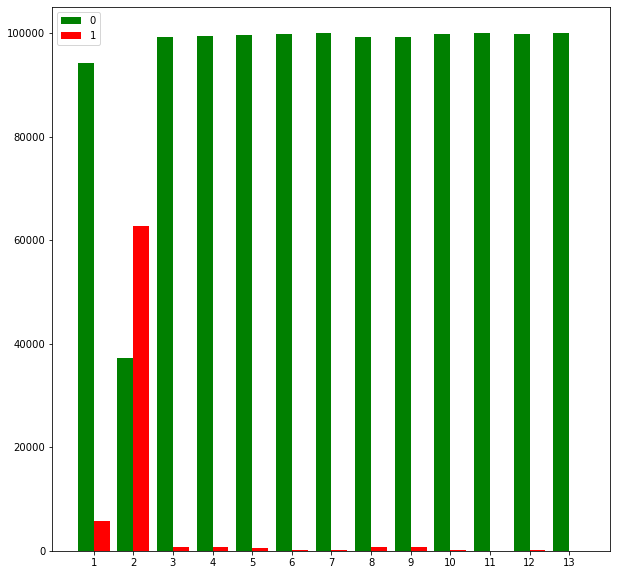

In [183]:
zeros=[]
ones=[]
kw=np.arange(1,14)
for i in range(1,14):
    data=train_df['kw{}'.format(i)].value_counts()
    zeros.append(data[0])
    ones.append(data[1])
plt.figure(figsize=(10,10))

plt.bar(kw - 0.2,
        zeros,
        color='green',
        edgecolor='none',
        width=0.4,
        align='center',
        label='0')

plt.bar(kw + 0.2,
        ones,
        color='red',
        edgecolor='none',
        width=0.4,
        align='center',
        label='1')

plt.xticks(kw, [str(j) for j in kw])
plt.legend()
plt.show()

In [184]:
to_sort_kw=[]
for i in range(0,13):
    to_sort_kw.append((ones[i],i+1))
to_sort_kw.sort()
to_sort_kw

[(20, 13),
 (31, 11),
 (100, 7),
 (151, 12),
 (156, 6),
 (198, 10),
 (445, 5),
 (658, 4),
 (737, 8),
 (739, 9),
 (779, 3),
 (5757, 1),
 (62731, 2)]

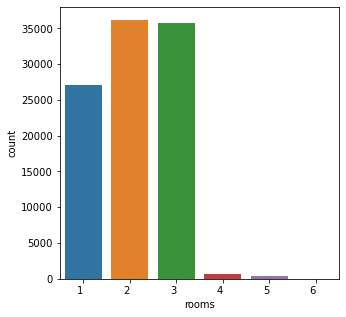

In [185]:
plt.figure(figsize=(5, 5))
chart = sns.countplot(train_df['rooms'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

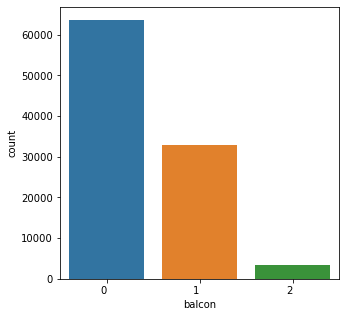

In [186]:
plt.figure(figsize=(5, 5))
chart = sns.countplot(train_df['balcon'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

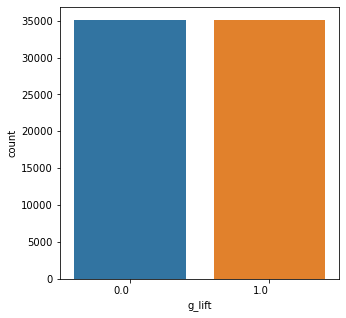

In [187]:
plt.figure(figsize=(5, 5))
chart = sns.countplot(train_df['g_lift'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

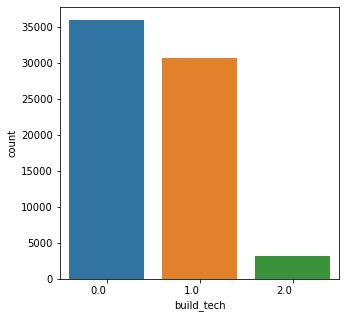

In [188]:
plt.figure(figsize=(5, 5))
chart = sns.countplot(train_df['build_tech'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

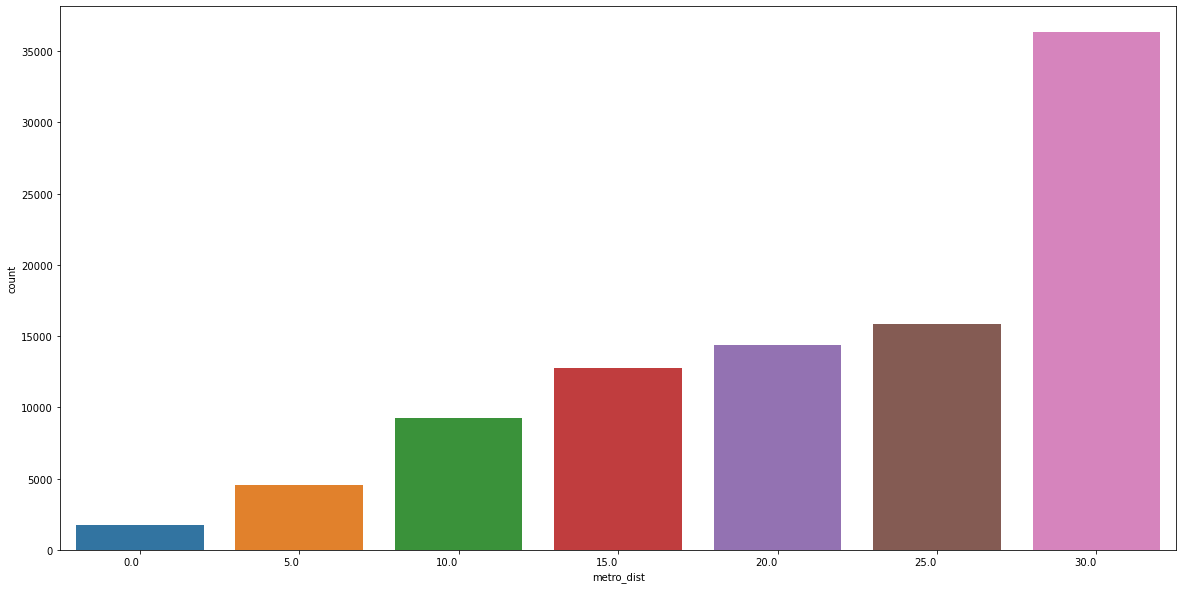

In [189]:
plt.figure(figsize=(20, 10))
chart = sns.countplot(train_df['metro_dist'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

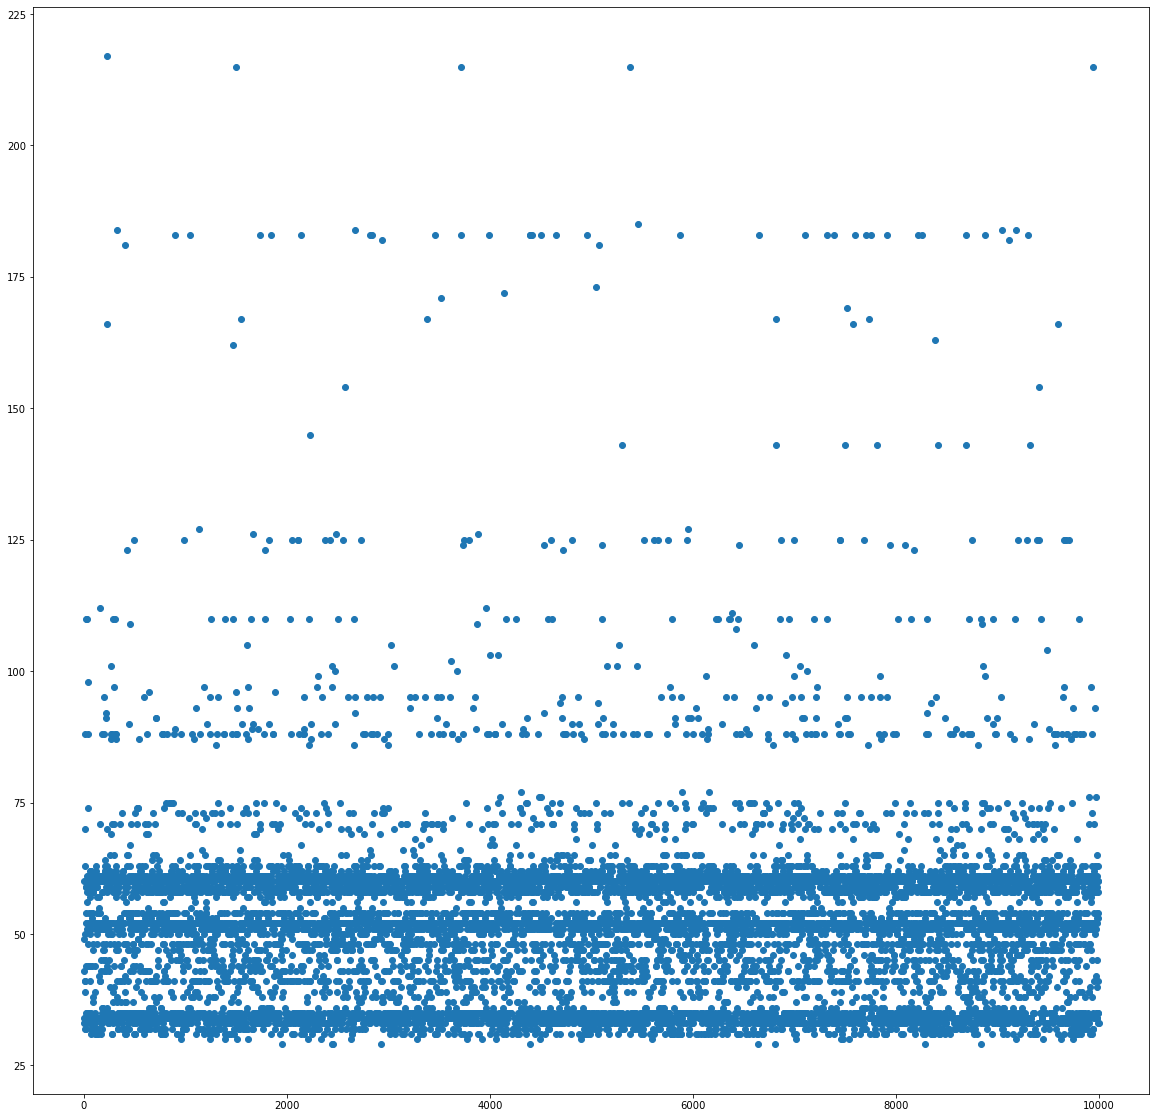

In [190]:
y_l=[]
for i in range(0,10000):
    y_l.append(train_df['area'][i])

x = range(0,10000)
plt.figure(figsize=(20,20))
plt.scatter(x, y_l)
plt.show()

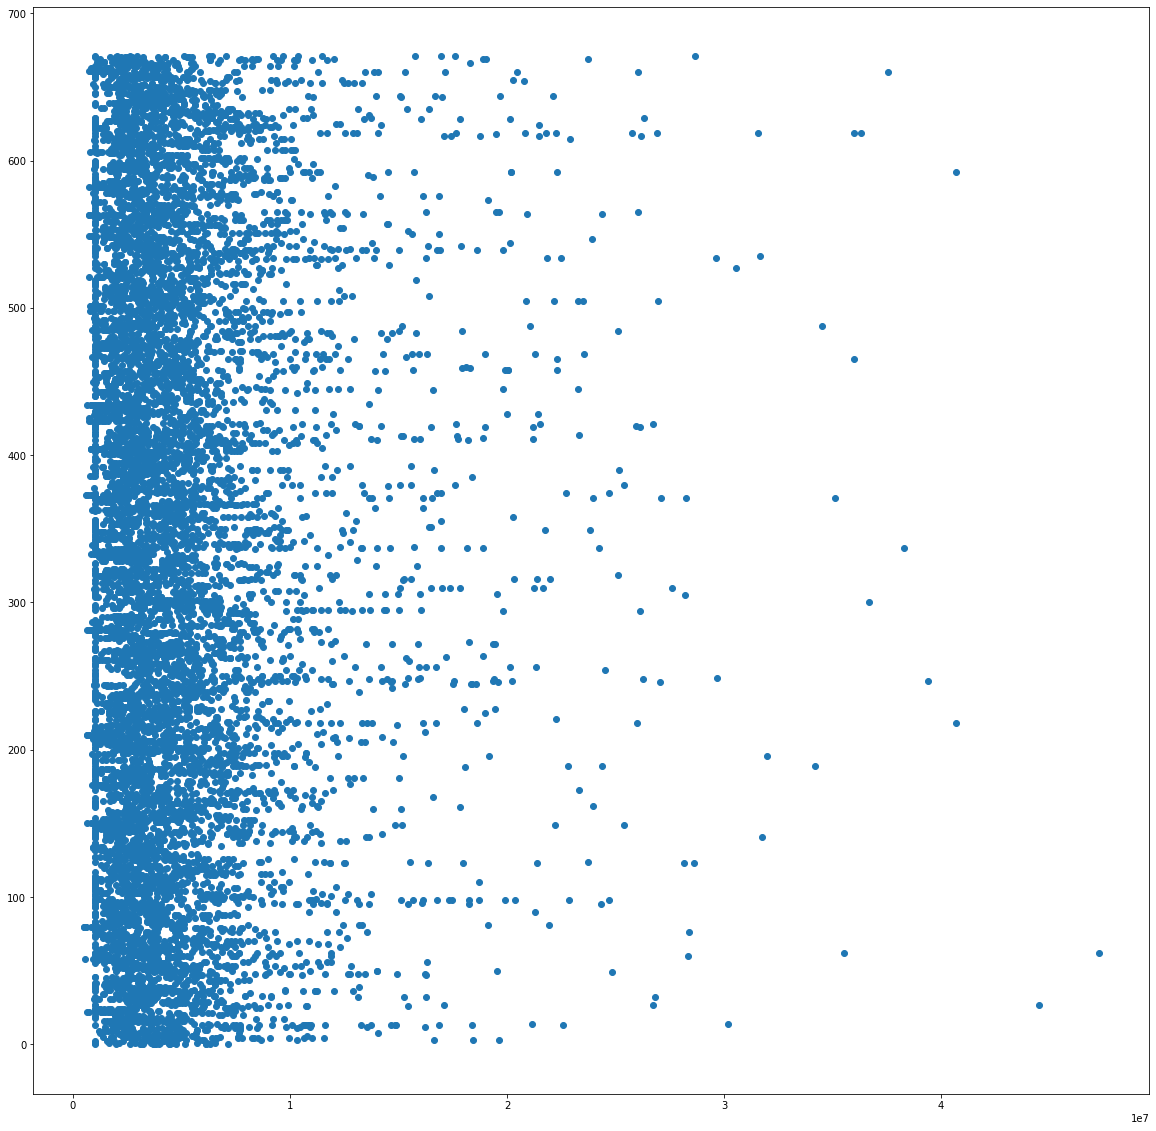

In [191]:
y_price=[]
street_id=[]
for i in range(0,10000):
    street_id.append(train_df['street_id'][i])
    y_price.append(train_df['price'][i])
plt.figure(figsize=(20,20))
plt.scatter(y_price,street_id)
plt.show()

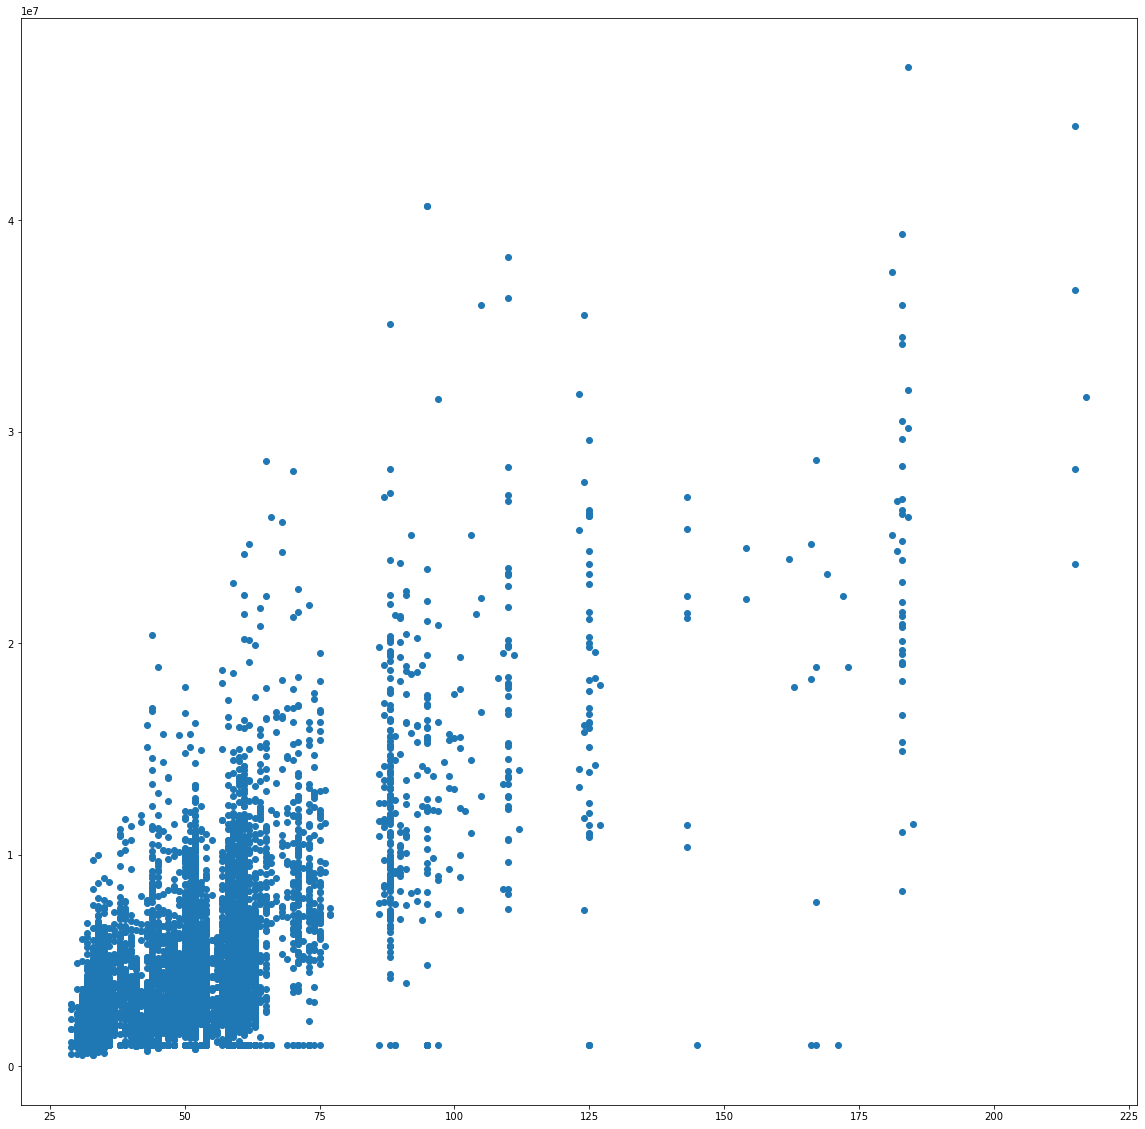

In [192]:
plt.figure(figsize=(20,20))
plt.scatter(y_l,y_price)
plt.show()

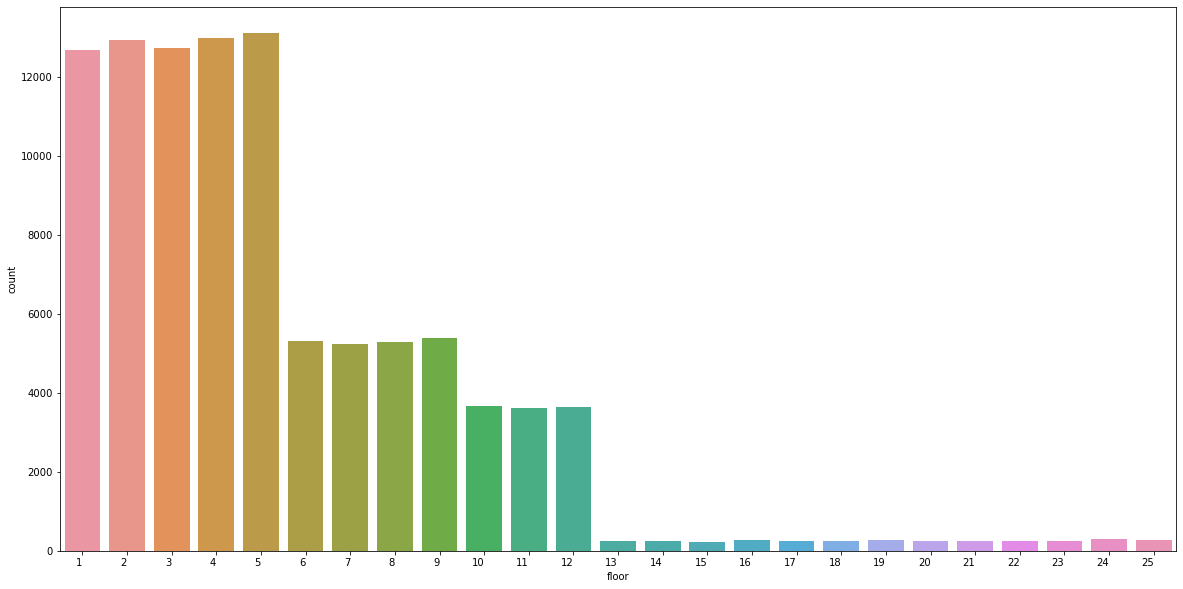

In [193]:
plt.figure(figsize=(20, 10))
chart = sns.countplot(train_df['floor'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

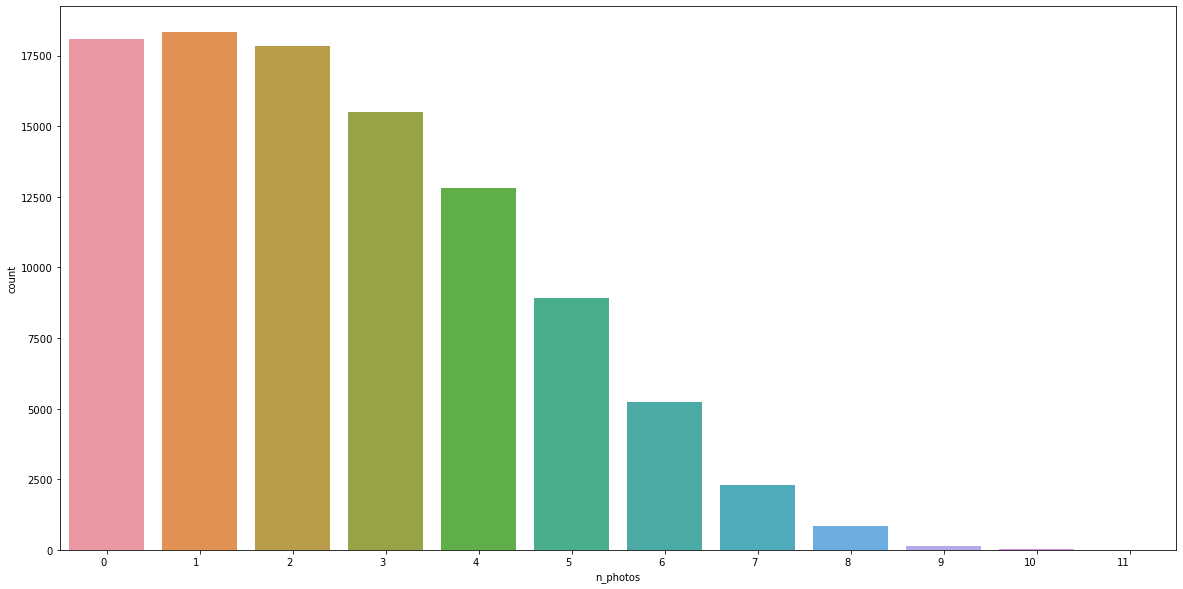

In [194]:
plt.figure(figsize=(20, 10))
chart = sns.countplot(train_df['n_photos'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

In [195]:
print(train_df['street_id'].value_counts())

268    184
596    183
478    181
32     181
175    181
      ... 
2      116
492    115
555    115
477    114
438    110
Name: street_id, Length: 672, dtype: int64


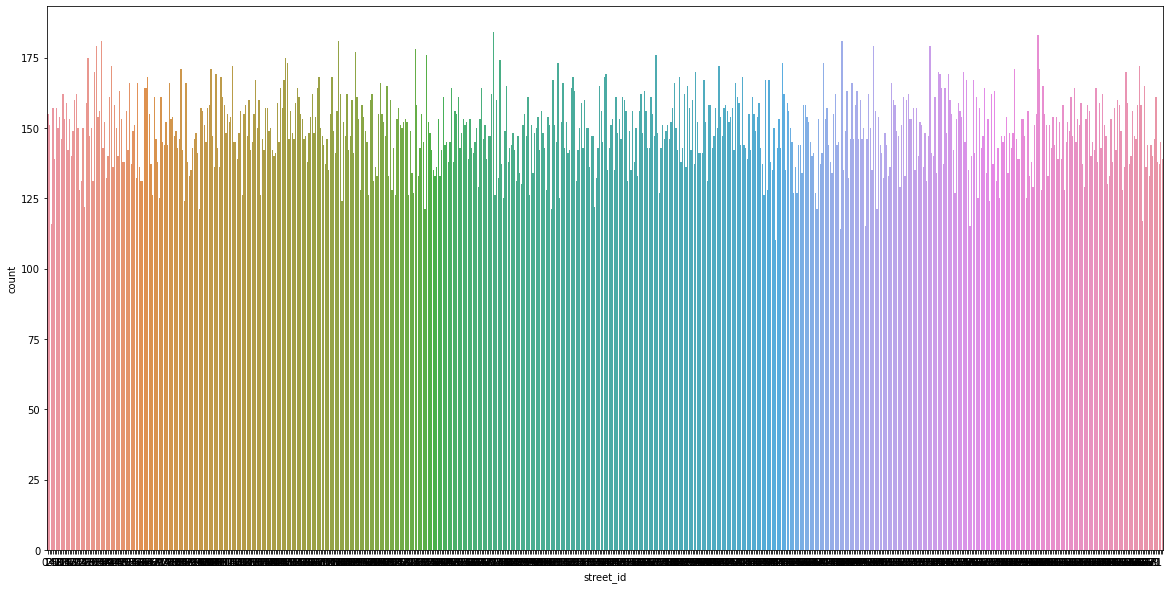

In [196]:
plt.figure(figsize=(20, 10))
chart = sns.countplot(train_df['street_id'])
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

In [197]:
street_id=set()
for i in range(0,10000):
   street_id.add(train_df['street_id'][i])
print(street_id)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [198]:
print(train_df['street_id'].value_counts())

268    184
596    183
478    181
32     181
175    181
      ... 
2      116
492    115
555    115
477    114
438    110
Name: street_id, Length: 672, dtype: int64


In [199]:
train_df = train_df.drop(train_df[(train_df['area']>80) & (train_df['price']<2000000)].index)
#train_df = train_df.drop(train_df[(train_df['area']>150)&(train_df['area']<157) & (train_df['price']<15000000)].index)
#train_df = train_df.drop(train_df[(train_df['area']>150)&(train_df['area']<175) & (train_df['price']<15000000)].index)
#train_df = train_df.drop(train_df[(train_df['price']>65000000)].index) - bad version
y=train_df['price'].values
l1=train_df.shape[0]
l2=train_df.shape[1]
print(l1)
print(l2)
X=train_df.iloc[:,2:25]
X=X.drop(['price','kw7','kw11','kw13'],axis='columns')
X=X.fillna(X.median())
X
#99829

99829
25


,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw8,kw9,kw10,kw12
0,616,0.0,4,43,2,0,30.0,1.0,1,0,1,0,0,0,0,0,0,0,0
1,112,0.0,3,33,1,0,15.0,1.0,2,0,1,0,0,0,0,0,0,0,0
2,230,0.0,9,34,1,0,25.0,0.0,4,0,1,0,0,0,0,0,0,0,0
3,302,1.0,4,60,3,0,15.0,0.0,2,1,1,0,0,0,0,0,0,0,0
4,578,0.0,3,49,2,0,30.0,0.0,2,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,612,0.0,3,36,1,0,30.0,0.0,3,0,1,0,0,0,0,0,0,0,0
99996,573,0.0,4,51,2,0,30.0,0.0,3,0,0,0,0,0,0,0,0,0,0
99997,550,0.0,9,48,2,0,30.0,0.0,0,0,1,0,0,0,0,0,0,0,0
99998,595,1.0,10,51,2,1,15.0,1.0,1,0,1,0,0,0,0,0,0,0,0


In [200]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [212]:
test_df = pd.read_csv('Test.csv', sep=',')
idd=test_df['id']
test_df=test_df.drop(['date','id','kw7','kw11','kw13'],axis='columns')
test_df=test_df.fillna(test_df.median())
test_df

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw8,kw9,kw10,kw12
0,422,0.0,1,59,3,0,25.0,0.0,1,0,1,0,0,0,0,0,0,0,0
1,380,0.0,10,58,2,0,25.0,0.0,4,0,1,0,0,0,0,0,0,0,0
2,362,1.0,3,54,2,0,10.0,0.0,2,0,1,0,0,0,0,0,0,0,0
3,34,0.0,4,35,1,0,25.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4,562,0.0,4,56,3,0,30.0,0.0,2,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,89,0.0,2,43,2,0,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0
99996,664,1.0,7,62,3,1,30.0,0.0,7,0,1,0,0,0,0,0,0,0,0
99997,358,0.0,2,35,1,1,30.0,0.0,1,1,0,0,0,0,0,0,0,0,0
99998,224,1.0,3,52,2,1,30.0,0.0,1,0,1,0,0,0,0,0,0,0,0


In [49]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [89]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [90]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [91]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [92]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [93]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[15:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/

In [94]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [95]:
temp_pred=blend_models_predict(X)
print(ase(temp_pred,y))

1421610.6461004245


In [96]:
resuk=blend_models_predict(test_df)
test_df['id']=idd
test_df["price"] = resuk
test_df[["id", "price"]].to_csv("manymodels.csv", index=False)

In [217]:
num_est=[]
for i in range(1,26):
    num_est.append(20*i)
print(num_est)

[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]


In [218]:
dep=[]
for i in range(1,16):
    dep.append(2*i)
print(dep)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


In [138]:
#from sklearn.metrics import make_scorer
##define your own mse and set greater_is_better=False
#ase1 = make_scorer(ase,greater_is_better=False)
#skf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#parameters = {'n_estimators': num_est, 'max_depth': dep,}
#rfc1 = GradientBoostingRegressor(random_state=42)
#gcv = GridSearchCV(rfc1, parameters, n_jobs=18,scoring=ase1, cv=skf1, verbose=1)
#gcv.fit(X, y)

In [139]:
#gcv.best_estimator_

In [140]:
#abs(gcv.best_score_)

In [141]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
def CV(RFC, X, y):

    temp_train_ase = []
    temp_test_ase = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        RFC.fit(X_train, y_train)
        train_ans = RFC.predict(X_train)
        test_ans = RFC.predict(X_test)
        temp_train_ase.append(ase(y_train, train_ans))
        temp_test_ase.append(ase(y_test, test_ans))
    
    return temp_train_ase, temp_test_ase

In [142]:
def visualize(test_metric_ase, train_metric_ase, grid, xlabel='X'):

    train_ase, test_ase = np.asarray(train_metric_ase), np.asarray(test_metric_ase)
    print ("Best ase_score on CV is {:.4f} with {}".format(min(test_ase.mean(axis=1)), 
                                                    grid[np.argmin(test_ase.mean(axis=1))]), xlabel)
    plt.style.use('ggplot')
    plt.figure(figsize=(16, 8))
    plt.title("Absolute mean error")
    plt.plot(grid, test_ase.mean(axis=1), label="test")
    plt.plot(grid, train_ase.mean(axis=1), label="train")
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

In [226]:
X=X.values

In [229]:
train_ase = []
test_ase=[]
trees_grid = [3,4,5,6,7,8,9,10,11,12,13,14,15]

for ntrees in tqdm_notebook(trees_grid):
    RFC = GradientBoostingRegressor(n_estimators=500,max_depth=ntrees, random_state=42)
    temp_train_ase, temp_test_ase  = CV(RFC, X, y)
    train_ase.append(temp_train_ase)
    test_ase.append(temp_test_ase)

<ipython-input-229-194198c9d05c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ntrees in tqdm_notebook(trees_grid):


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\s

KeyboardInterrupt: 

Best ase_score on CV is 2124563.7880 with 8 trees number


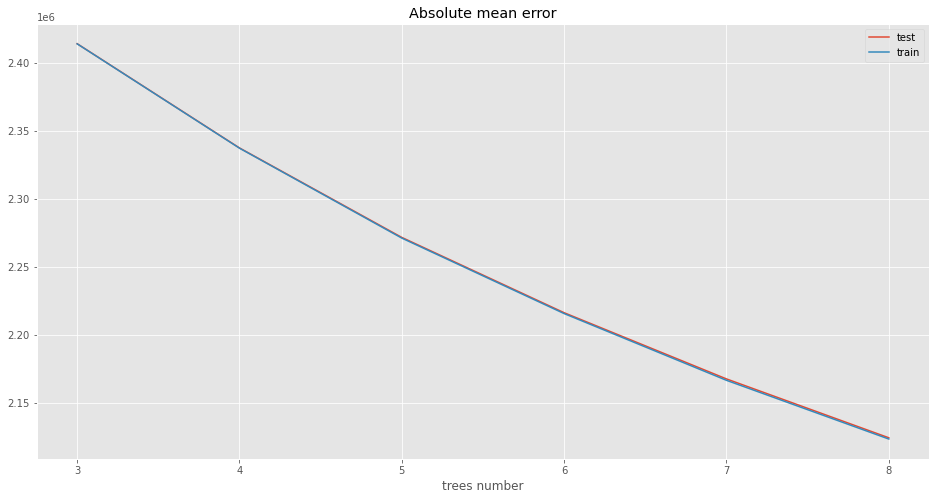

In [105]:
visualize(test_ase, train_ase, trees_grid, "max_depth")

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
train_ase = []
test_ase=[]
n_trees = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n in tqdm_notebook(n_trees):
    RFR = RandomForestRegressor(n_estimators=1500,max_depth=n)
    RFR.fit(X_train, y_train)
    temp_pred=RFR.predict(X_train)
    train_ase.append(ase(temp_pred,y_train))
    temp_pred=RFR.predict(X_test)
    test_ase.append(ase(temp_pred,y_test))

<ipython-input-59-251f8d1ac69c>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(n_trees):


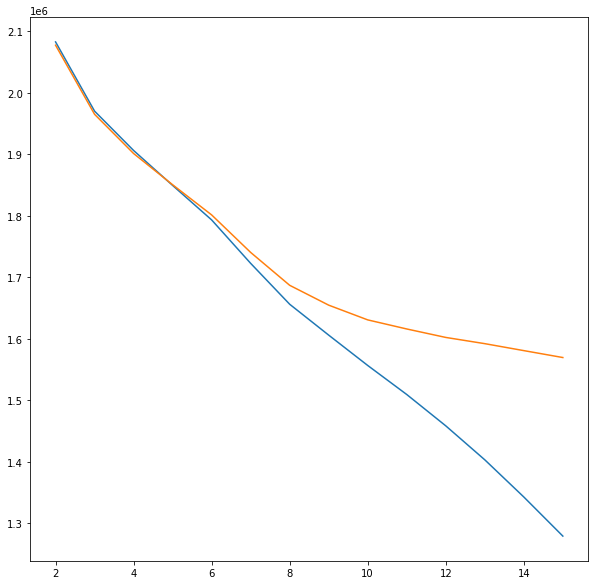

In [28]:
plt.figure(figsize=(10,10))
plt.plot(n_trees,train_ase)
plt.plot(n_trees,test_ase)
plt.show()

In [30]:
print(train_ase)
print(test_ase)

[2082989.5409400552, 1970396.188078626, 1906411.3502715984, 1849564.7548040054, 1793495.5847035674, 1722842.8205916034, 1656340.7617239784, 1606115.1843389946, 1556777.1828366735, 1509563.270865291, 1458593.3243532556, 1403337.4639774787, 1342893.2336345506, 1279307.8309061793]
[2077620.8774065082, 1965219.4722526993, 1901472.9858438326, 1850705.5573108674, 1801618.4181011622, 1740609.5775982693, 1687145.6009871496, 1654867.463787993, 1630913.6794885278, 1616137.278073806, 1602384.7976603871, 1592259.9372568938, 1580938.5159369856, 1569695.0107201892]


In [211]:
#drop date 7,11,13
#best depth=30
#for 500 estimators optimum is depth 9
#'kw6','kw7','kw10','kw11','kw12','kw13' - too much
#445691.56239259004
#445016.6328334396//
#372919.35055939265
#345643.0435891761n_estimators=800,max_depth=9
#(n_estimators=800,max_depth=8)
#424213.0818879764
#475147.9066558373
RGBR = GradientBoostingRegressor(loss='huber',learning_rate=0.12,n_estimators=2100,min_samples_leaf=3,max_depth=6) #430847.3134691238 501557.9274039447-cur
RGBR.fit(X, y)
temp_pred=RGBR.predict(X)
print(ase(temp_pred,y)) #кдючевая ячейка 1

476984.65641838685


In [213]:
resuk=RGBR.predict(test_df)
test_df['id']=idd
test_df["price"] = resuk
test_df[["id", "price"]].to_csv("huber.csv", index=False) #ключевая ячейка 2

In [18]:
train_ase = []
n_depth = [ 1,5,10,20,30,40,50,60,70,80,90,100]
for n in tqdm_notebook(n_depth):
    RGBR = GradientBoostingRegressor(n_estimators=500,max_depth=n)
    RGBR.fit(X, y)
    temp_pred=RGBR.predict(X)
    print(ase(temp_pred,y))
    train_ase.append(ase(temp_pred,y))

<ipython-input-18-847ce481d4e9>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(n_depth):


1735101.3508729618
944868.3284778949
371449.1813370863
2594.264911397857
2042.4466794623381
2042.4466675322772



KeyboardInterrupt: 

In [ ]:
cur=np.argmin(train_ase)
best_depth=n_depth[cur]
print(best_depth)
print(train_ase[cur])
plt.figure(figsize=(10,10))
plt.plot(n_depth,train_ase)
plt.show()

In [104]:
#RFR = RandomForestRegressor(n_estimators=400)
#RFR.fit(X, y)
#y_pred=RFR.predict(X)
#print(ase(y_pred,y))

538048.5532217614


In [25]:
resuk=LGBM.predict(test_df)
#test_df['id']=idd
#test_df["price"] = resuk
#test_df[["id", "price"]].to_csv("result6.csv", index=False)

ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 21 

In [47]:
train_ase = []
n_estimators = [1, 2, 4, 8, 16, 32, 50, 100, 200, 300, 400, 500]
for n in tqdm_notebook(n_estimators):
    RFR = RandomForestRegressor(n_estimators=n)
    RFR.fit(X, y)
    temp_pred=RFR.predict(X)
    train_ase.append(ase(temp_pred,y))

<ipython-input-47-bc5daa10220c>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(n_estimators):


In [48]:
cur=np.argmin(train_ase)
best_estimator=n_estimators[cur]
print(best_estimator)
print(train_ase[cur])

400
573536.5580285714


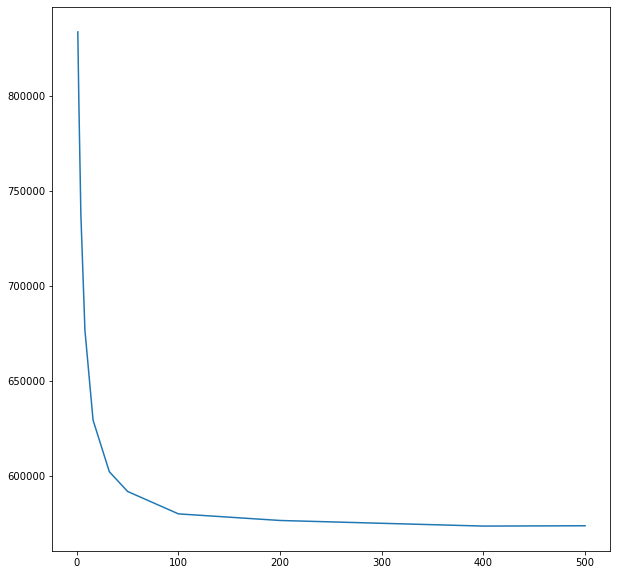

In [49]:
plt.figure(figsize=(10,10))
plt.plot(n_estimators,train_ase)
plt.show()

In [76]:
#RFR = RandomForestRegressor(n_estimators=best_estimator,max_depth=10)
#RFR.fit(X, y)
#y_pred=RFR.predict(X)
#ase(y_pred,y)
train_ase = []
n_depth = [ 1,5,10,20,30,40,50,60,70,80,90,100]
for n in tqdm_notebook(n_depth):
    RFR = RandomForestRegressor(n_estimators=best_estimator,max_depth=n)
    RFR.fit(X, y)
    temp_pred=RFR.predict(X)
    print(ase(temp_pred,y))
    train_ase.append(ase(temp_pred,y))

<ipython-input-76-87eb6fb967e4>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(n_depth):


2274458.1646897336
1812374.9298751492
1575845.4881680482
947478.2054358382
604179.492036125
574713.478813121
573815.8303108017



KeyboardInterrupt: 

10
1576626.9352211754


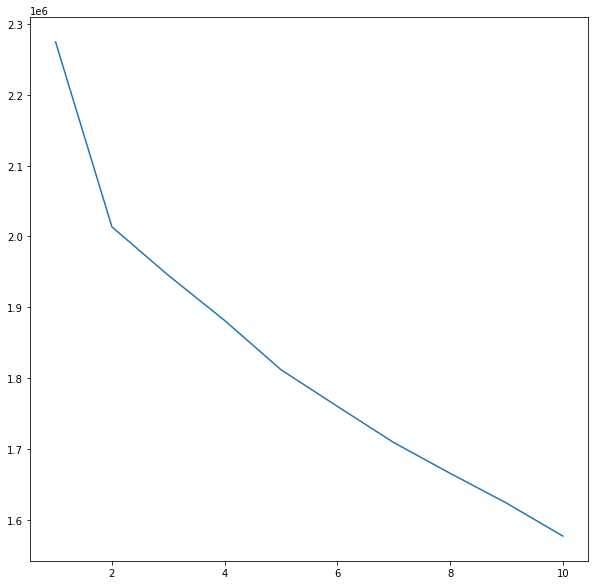

In [71]:
cur=np.argmin(train_ase)
best_depth=n_depth[cur]
print(best_depth)
print(train_ase[cur])
plt.figure(figsize=(10,10))
plt.plot(n_depth,train_ase)
plt.show()

In [72]:
train_ase

[2274834.0050185206,
 2013495.8129893476,
 1945123.7440864039,
 1881254.7378742713,
 1811632.7069638357,
 1759929.5207061167,
 1708782.3308039587,
 1665346.4077407871,
 1623286.295571965,
 1576626.9352211754]